Level 1

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Cognifyz Technologies\Dataset .csv")

#To display Maximum Columns
pd.options.display.max_columns=None
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
#Value_counts is to get the count
top_cuisines = df['Cuisines'].value_counts().head(3)
top_cuisines

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

In [5]:
#Percentage of Restaurants Serving Each of the Top Cuisines:
total_restaurants = df.shape[0]
top_cuisine_percentages = (top_cuisines / total_restaurants) * 100
top_cuisine_percentages


Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64

In [6]:
#idxmax()-returns a Series with the index of the maximum value for each column

#Identify the City with the Highest Number of Restaurants:

top_city = df['City'].value_counts().idxmax()
top_city


'New Delhi'

In [7]:
#Calculate the Average Rating for Restaurants in Each City:

avg_city_ratings = df.groupby('City')['Aggregate rating'].mean()
avg_city_ratings


City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

In [8]:
#Determine the City with the Highest Average Rating:

highest_avg_rating_city = avg_city_ratings.max()
highest_avg_rating_city


4.9

In [9]:
highest_avg_rating_city = avg_city_ratings.idxmax()
highest_avg_rating_city


'Inner City'

In [10]:
price_range_counts = df['Price range'].value_counts()
price_range_counts

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

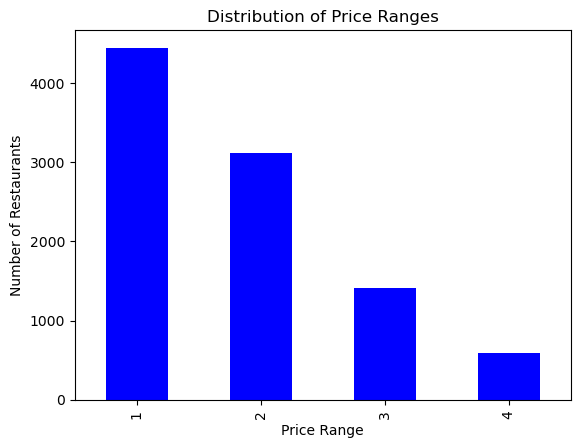

In [11]:
#Create a histogram or bar chart to visualize the distribution:
import matplotlib.pyplot as plt

# Visualize the distribution of price ranges
price_range_counts = df['Price range'].value_counts()
price_range_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()


In [12]:
#Calculate the percentage of restaurants in each price range category:

price_range_percentages = (price_range_counts / total_restaurants) * 100
price_range_percentages


Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64

In [13]:
#Determine the percentage of restaurants that offer online delivery:

online_delivery_percentage = df['Has Online delivery'].value_counts(normalize = True) * 100
online_delivery_percentage


Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

In [14]:
# Compare the average ratings of restaurants with and without online delivery:

avg_ratings_online_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()
avg_ratings_online_delivery


Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

Level 2

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


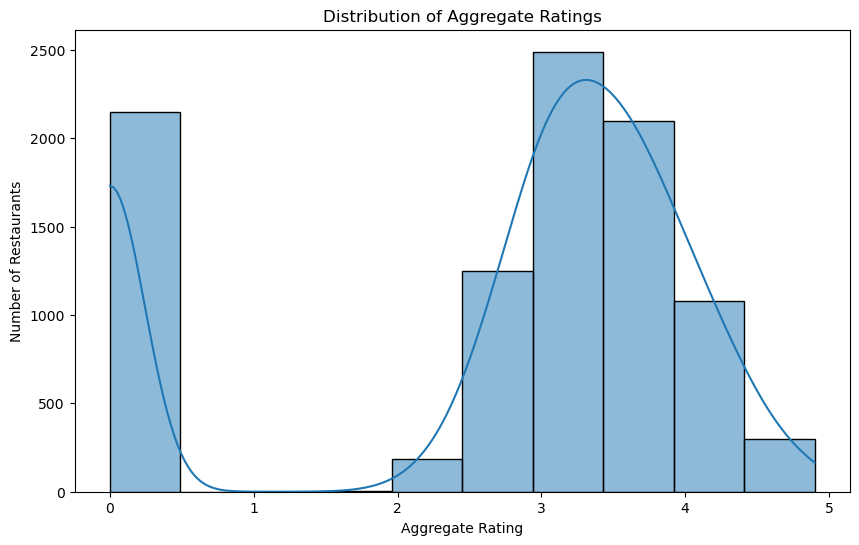

0.0

In [15]:
# Analyze the distribution of aggregate ratings and determine the most common rating range:

# Plotting the distribution of aggregate ratings
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()

# Determine the most common rating range
most_common_rating_range = df['Aggregate rating'].value_counts().idxmax()
most_common_rating_range


In [16]:
# Calculate the average number of votes received by restaurants:

avg_votes = df['Votes'].mean()
print(f"The average number of votes received by restaurants is: {avg_votes}")


The average number of votes received by restaurants is: 156.909747670401


In [17]:
# Identify the most common combinations of cuisines:
from collections import Counter
# Splitting cuisine combinations and counting occurrences
cuisine_combinations = df['Cuisines'].dropna().str.split(', ').tolist()
cuisine_counter = Counter([tuple(sorted(cuisine_combo)) for cuisine_combo in cuisine_combinations])
most_common_combinations = cuisine_counter.most_common(5)
print("Most common cuisine combinations:", most_common_combinations)


Most common cuisine combinations: [(('North Indian',), 936), (('Chinese', 'North Indian'), 616), (('Mughlai', 'North Indian'), 394), (('Chinese',), 354), (('Fast Food',), 354)]


In [18]:
# Determine if certain cuisine combinations tend to have higher ratings:

# Group by cuisine combinations and calculate average ratings
df['Cuisine Combinations'] = df['Cuisines'].apply(lambda x: tuple(sorted(x.split(', '))) if pd.notna(x) else ())
avg_rating_by_combination = df.groupby('Cuisine Combinations')['Aggregate rating'].mean()
print("Average ratings by cuisine combination:\n", avg_rating_by_combination.sort_values(ascending=False).head(10))


Average ratings by cuisine combination:
 Cuisine Combinations
(World Cuisine,)                     4.9
(American, BBQ, Sandwich)            4.9
(American, Sandwich, Tea)            4.9
(Indonesian, Sunda)                  4.9
(Hawaiian, Seafood)                  4.9
(American, Healthy Food, Mexican)    4.9
(Asian, European, Indian)            4.9
(European, German)                   4.9
(American, Coffee and Tea)           4.9
(BBQ, Breakfast, Southern)           4.9
Name: Aggregate rating, dtype: float64


In [19]:
!pip install folium

In [ ]:
# Plot the locations of restaurants on a map using longitude and latitude coordinates:
import folium
# Create a map centered around the average location
avg_lat = df['Latitude'].mean()
avg_lon = df['Longitude'].mean()
restaurant_map = folium.Map(location=[avg_lat, avg_lon])

# Add points to the map
for _, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(restaurant_map)

# Save the map as an HTML file
restaurant_map

In [ ]:
!pip install folium scikit-learn


In [ ]:
# Identify any patterns or clusters of restaurants in specific areas:
from sklearn.cluster import DBSCAN
# This would involve visually inspecting the generated map for clusters
# and using clustering algorithms like DBSCAN for more detailed analysis.
coords = df[['Latitude', 'Longitude']].dropna().values
db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
labels = db.labels_

# Add the cluster labels to the dataframe
df['Cluster'] = labels

Number of clusters found: 38
Number of noise points: 1387
          Restaurant Name   Latitude   Longitude  Cluster
0        Le Petit Souffle  14.565443  121.027535       -1
1        Izakaya Kikufuji  14.553708  121.014101       -1
2  Heat - Edsa Shangri-La  14.581404  121.056831       -1
3                    Ooma  14.585318  121.056475       -1
4             Sambo Kojin  14.584450  121.057508       -1


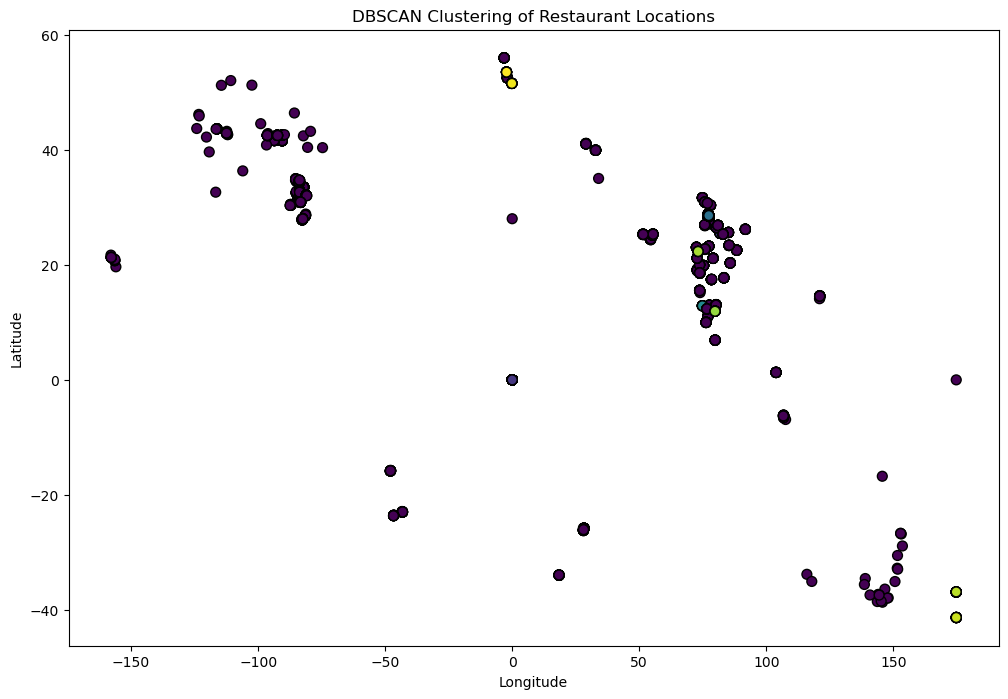

In [22]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Drop rows with missing coordinates and extract the values
coords = df[['Latitude', 'Longitude']].dropna().values

# Apply DBSCAN clustering
db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
labels = db.labels_

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Print the number of clusters found (-1 means noise)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points: {(labels == -1).sum()}")

# Display a few rows with cluster labels
print(df[['Restaurant Name', 'Latitude', 'Longitude', 'Cluster']].head())

# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering of Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [23]:
# Identify if there are any restaurant chains present:

# Checking for restaurant chains by counting occurrences of restaurant names
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]
print("Restaurant chains:\n", restaurant_chains)


Restaurant chains:
 Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


In [24]:
#Analyze the ratings and popularity of different restaurant chains:

# Group by restaurant name and calculate average ratings and votes
chain_ratings = df[df['Restaurant Name'].isin(restaurant_chains.index)].groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).sort_values(by='Aggregate rating', ascending=False)
print("Top restaurant chains by rating:\n", chain_ratings.head(10))


Top restaurant chains by rating:
                            Aggregate rating  Votes
Restaurant Name                                   
Talaga Sampireun                      4.900   5514
Silantro Fil-Mex                      4.850   1364
AB's Absolute Barbecues               4.850   3151
AB's - Absolute Barbecues             4.825  13400
Naturals Ice Cream                    4.800   3094
Gymkhana                              4.700    328
The Cheesecake Factory                4.650   3010
Dishoom                               4.600   1269
Garota de Ipanema                     4.600     59
Chili's                               4.580   8156


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r'C:\Users\ASUS\Downloads\Cognifyz Technologies\Dataset .csv')

# Ensure we have the 'Review Text' and 'Aggregate rating' columns
if 'Review Text' in df.columns and 'Aggregate rating' in df.columns:
    reviews = df['Review Text'].dropna()
    ratings = df['Aggregate rating']

    # Step 1: Preprocess Reviews
    nltk.download('stopwords')
    nltk.download('vader_lexicon')
    stop_words = set(stopwords.words('english'))

    def preprocess_text(text):
        text = text.lower()
        text = ''.join([char for char in text if char.isalpha() or char.isspace()])
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text

    reviews_cleaned = reviews.apply(preprocess_text)

    # Step 2: Identify Common Positive and Negative Keywords
    vectorizer = CountVectorizer(max_features=1000)
    X = vectorizer.fit_transform(reviews_cleaned)
    keywords = vectorizer.get_feature_names_out()
    
    # Sentiment Analysis
    sid = SentimentIntensityAnalyzer()
    sentiments = reviews_cleaned.apply(lambda x: sid.polarity_scores(x))

    positive_keywords = []
    negative_keywords = []

    for keyword in keywords:
        keyword_sentiment = sentiments[reviews_cleaned.str.contains(keyword)]
        avg_sentiment = keyword_sentiment.apply(pd.Series).mean()
        if avg_sentiment['compound'] >= 0.05:
            positive_keywords.append(keyword)
        elif avg_sentiment['compound'] <= -0.05:
            negative_keywords.append(keyword)

    print("Most common positive keywords:")
    print(positive_keywords[:10])

    print("Most common negative keywords:")
    print(negative_keywords[:10])

    # Step 3: Calculate the Average Length of Reviews
    review_lengths = reviews_cleaned.apply(len)
    avg_review_length = review_lengths.mean()
    print(f"Average review length: {avg_review_length} characters")

    # Step 4: Explore the Relationship Between Review Length and Rating
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=review_lengths, y=ratings)
    plt.title('Relationship Between Review Length and Rating')
    plt.xlabel('Review Length')
    plt.ylabel('Rating')
    plt.show()
else:
    print("The dataset does not contain 'Review Text' or 'Aggregate rating' columns.")


The dataset does not contain 'Review Text' or 'Aggregate rating' columns.


In [35]:
import pandas as pd

# Load the data
df = pd.read_csv(r'C:\Users\ASUS\Downloads\Cognifyz Technologies\Dataset .csv')

# Print the column names
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


Restaurant(s) with highest votes (10934 votes): ['Toit']
Restaurant(s) with lowest votes (0 votes): ['Cantinho da Gula' 'The Chaiwalas' 'Fusion Food Corner' ...
 "Chef's Basket Pop Up Caf��" 'The Hangout-Deli' 'Platters']
The correlation between number of votes and ratings is: 0.31369058419541135


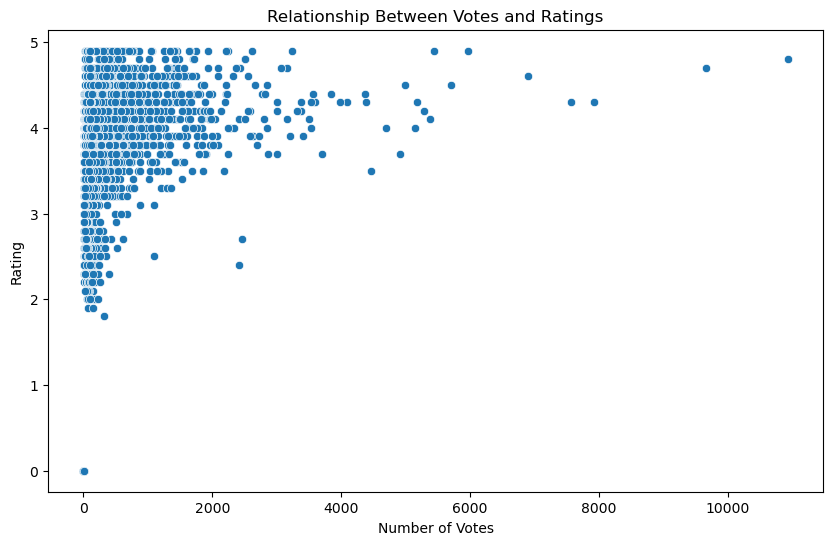

In [36]:
# Ensure we have the 'Votes' and 'Aggregate rating' columns
if 'Votes' in df.columns and 'Aggregate rating' in df.columns:
    # Step 1: Identify Restaurants with Highest and Lowest Votes
    max_votes = df['Votes'].max()
    min_votes = df['Votes'].min()

    restaurant_max_votes = df[df['Votes'] == max_votes]['Restaurant Name'].values
    restaurant_min_votes = df[df['Votes'] == min_votes]['Restaurant Name'].values

    print(f"Restaurant(s) with highest votes ({max_votes} votes): {restaurant_max_votes}")
    print(f"Restaurant(s) with lowest votes ({min_votes} votes): {restaurant_min_votes}")

    # Step 2: Analyze Correlation Between Votes and Ratings
    correlation = df['Votes'].corr(df['Aggregate rating'])
    print(f"The correlation between number of votes and ratings is: {correlation}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
    plt.title('Relationship Between Votes and Ratings')
    plt.xlabel('Number of Votes')
    plt.ylabel('Rating')
    plt.show()
else:
    print("The dataset does not contain 'Votes' or 'Aggregate rating' columns.")


Average cost for two for restaurants with online delivery: 678.6352509179926
Average cost for two for restaurants without online delivery: 1378.919295774648
Average cost for two for restaurants with table booking: 1535.8981001727116
Average cost for two for restaurants without table booking: 1152.7572977481234


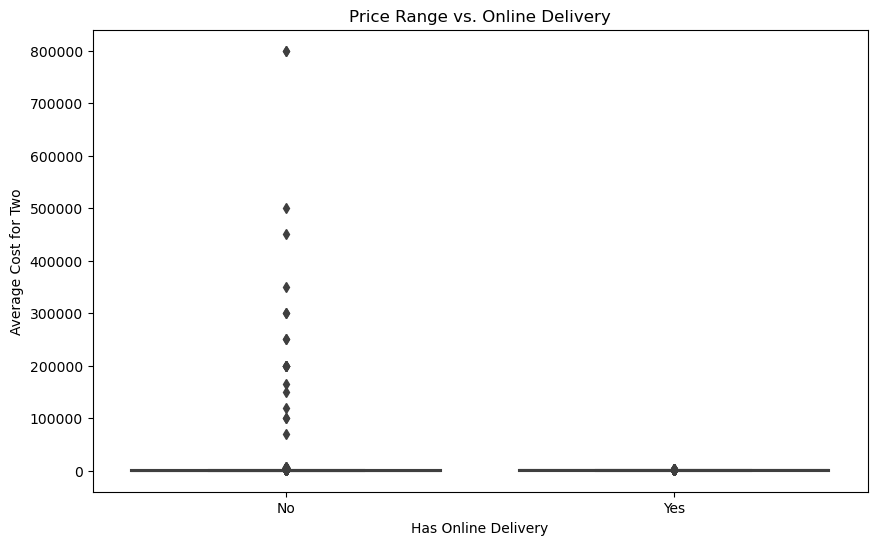

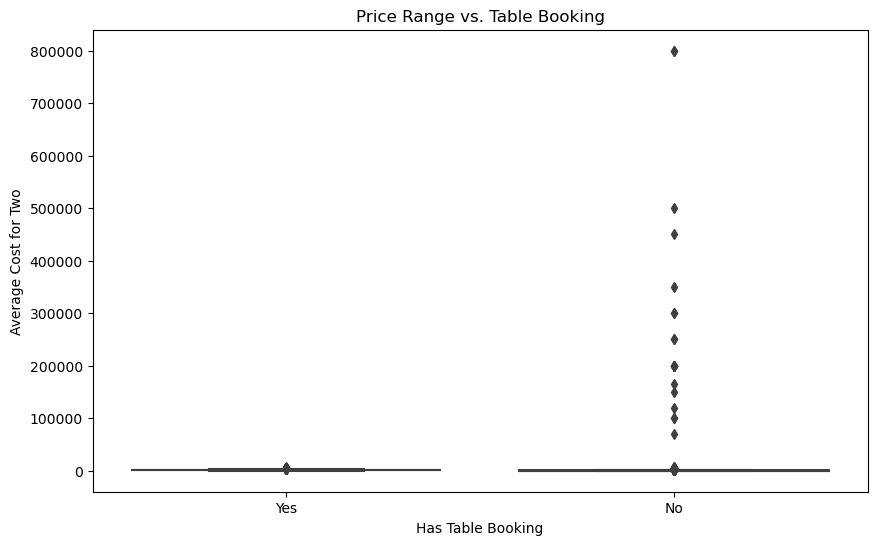

In [37]:
# Ensure we have the relevant columns
if 'Average Cost for two' in df.columns and 'Has Online delivery' in df.columns and 'Has Table booking' in df.columns:
    # Step 1: Analyze Relationship Between Price Range and Online Delivery
    avg_cost_online_delivery = df[df['Has Online delivery'] == 'Yes']['Average Cost for two'].mean()
    avg_cost_no_online_delivery = df[df['Has Online delivery'] == 'No']['Average Cost for two'].mean()

    print(f"Average cost for two for restaurants with online delivery: {avg_cost_online_delivery}")
    print(f"Average cost for two for restaurants without online delivery: {avg_cost_no_online_delivery}")

    # Step 2: Analyze Relationship Between Price Range and Table Booking
    avg_cost_table_booking = df[df['Has Table booking'] == 'Yes']['Average Cost for two'].mean()
    avg_cost_no_table_booking = df[df['Has Table booking'] == 'No']['Average Cost for two'].mean()

    print(f"Average cost for two for restaurants with table booking: {avg_cost_table_booking}")
    print(f"Average cost for two for restaurants without table booking: {avg_cost_no_table_booking}")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Has Online delivery', y='Average Cost for two', data=df)
    plt.title('Price Range vs. Online Delivery')
    plt.xlabel('Has Online Delivery')
    plt.ylabel('Average Cost for Two')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Has Table booking', y='Average Cost for two', data=df)
    plt.title('Price Range vs. Table Booking')
    plt.xlabel('Has Table Booking')
    plt.ylabel('Average Cost for Two')
    plt.show()
else:
    print("The dataset does not contain the required columns for this analysis.")
